<center><h2>Predict if the server will be hacked</h2></center>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import deal_outlier
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import KFold


In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


### Data Exploration

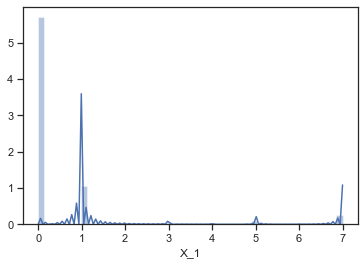

In [5]:
sns.distplot(train.X_1)

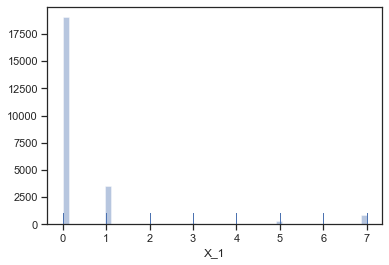

In [6]:
sns.distplot(train.X_1, kde=False, rug=True);

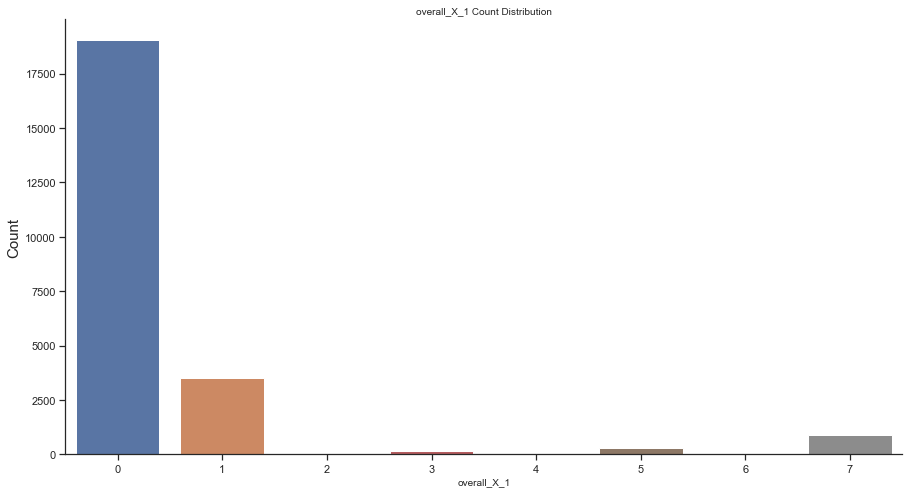

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'X_1', data = train)
ax.set_xlabel('overall_X_1', fontsize=10)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('overall_X_1 Count Distribution', fontsize=10)
sns.despine()

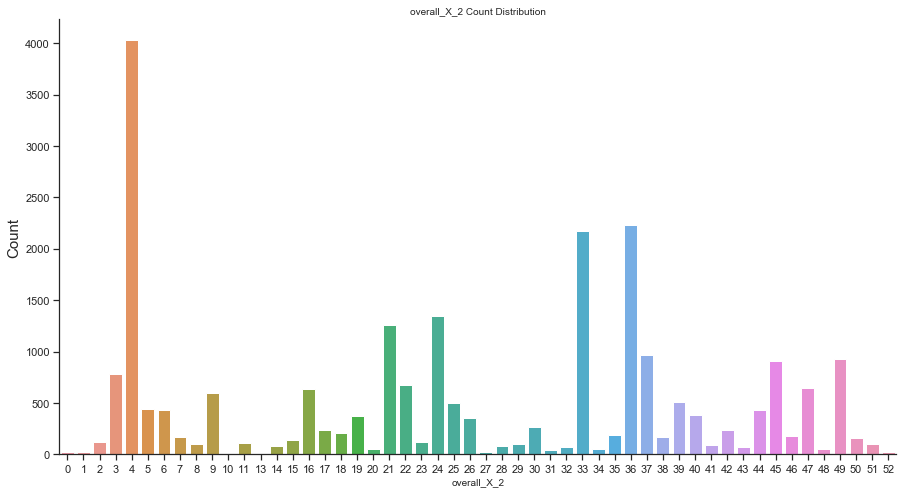

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'X_2', data = train)
ax.set_xlabel('overall_X_2', fontsize=10)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('overall_X_2 Count Distribution', fontsize=10)
sns.despine()

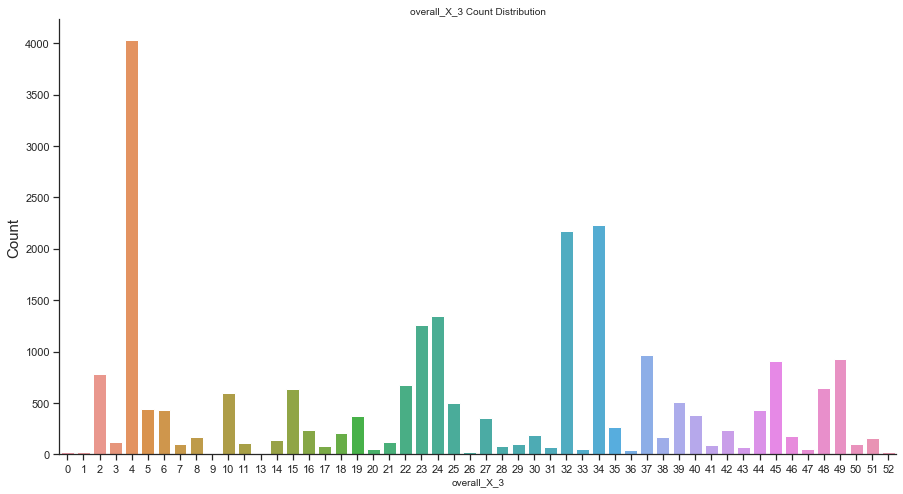

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'X_3', data = train)
ax.set_xlabel('overall_X_3', fontsize=10)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('overall_X_3 Count Distribution', fontsize=10)
sns.despine()

In [10]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
INCIDENT_ID    15903 non-null object
DATE           15903 non-null object
X_1            15903 non-null int64
X_2            15903 non-null int64
X_3            15903 non-null int64
X_4            15903 non-null int64
X_5            15903 non-null int64
X_6            15903 non-null int64
X_7            15903 non-null int64
X_8            15903 non-null int64
X_9            15903 non-null int64
X_10           15903 non-null int64
X_11           15903 non-null int64
X_12           15776 non-null float64
X_13           15903 non-null int64
X_14           15903 non-null int64
X_15           15903 non-null int64
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [13]:
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [14]:
test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

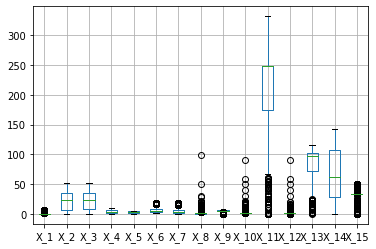

In [19]:
X.boxplot()

1º Quartile:  2.0
2º Quartile:  4.0
3º Quartile:  7.0
4º Quartile:  18.0
Lower bound -5.5
Upper bound 14.5
 above:  14.5 are outliers
Number of outliers in upper:  0
Number of clients:  23856
Outliers are: 0.0 %
Number of outliers in Lower:  23856
Number of clients:  23856
Outliers are: 100.0 %


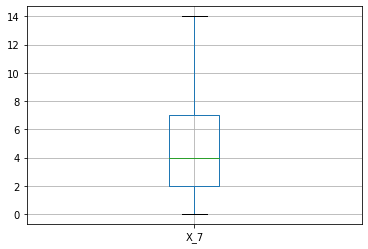

In [37]:
deal_outlier.deal_with_outlier('X_7',X)

In [15]:
train['X_12'].mean()

0.974064374419194

In [16]:
train['X_12'].median()

1.0

In [17]:
train['X_12'].fillna('1',inplace=True)

In [18]:
test['X_12'].mean()
test['X_12'].median()
test['X_12'].fillna('1',inplace=True)

In [19]:
train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [20]:
test.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23856 non-null object
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: int64(15), object(3)
memory usage: 3.3+ MB


In [22]:
train['X_12']=train['X_12'].astype(int)

In [23]:
test['X_12']=test['X_12'].astype(int)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23856 non-null int32
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: int32(1), int64(15), object(2)
memory usage: 3.2+ MB


In [25]:
train.drop('INCIDENT_ID',axis=1,inplace=True)

In [26]:
train.drop('DATE',axis=1,inplace=True)

In [27]:
test.drop('INCIDENT_ID',axis=1,inplace=True)
test.drop('DATE',axis=1,inplace=True)

In [28]:
train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [29]:
test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,1,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0,112,93,43


In [30]:
train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1,92,29,36,0
1,1,37,37,0,0,11,17,1,6,1,236,1,103,142,34,1
2,0,3,2,3,5,1,0,2,3,1,174,1,110,93,34,1
3,0,33,32,2,1,7,1,1,6,1,249,1,72,29,34,1
4,0,33,32,2,1,8,3,0,5,1,174,0,112,29,43,1


In [31]:
X=train.drop('MULTIPLE_OFFENSE',axis=1)

In [32]:
y=train.MULTIPLE_OFFENSE

In [33]:
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0,112,29,43


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
pred=clf.predict(X_test)

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.47      0.09      0.15       374
           1       0.96      0.99      0.98      7499

    accuracy                           0.95      7873
   macro avg       0.71      0.54      0.56      7873
weighted avg       0.93      0.95      0.94      7873



### Applying Decesion Tree

In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from sklearn.tree import export_graphviz

In [41]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Evaluate the model's performance on Train Datasets

Including the tree's axis-parallel decision boundaries and how the tree splits

In [42]:
# use the model to make predictions with the test data
y_pred_train = dtree.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.98


### Evaluate the model's performance on Test Datasets

Including the tree's axis-parallel decision boundaries and how the tree splits

In [44]:
# use the model to make predictions with the test data
y_pred_test = dtree.predict(X_test)
y_pred_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
accuracy = metrics.accuracy_score(y_test, y_pred_test)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.98


In [46]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.51      0.67       374
           1       0.98      1.00      0.99      7499

    accuracy                           0.98      7873
   macro avg       0.99      0.76      0.83      7873
weighted avg       0.98      0.98      0.97      7873



#### Plot a Confusion Matrix Using Below Function

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    cm pass the confusion Matrix
    pass the class like classes=['YES=1','NO=0'] 
    pass the title='Confusion matrix'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred_test))
print(round(accuracy_score(y_test, y_pred_test),2)*100)

[[ 191  183]
 [   1 7498]]
98.0


Confusion matrix, without normalization
[[ 191  183]
 [   1 7498]]


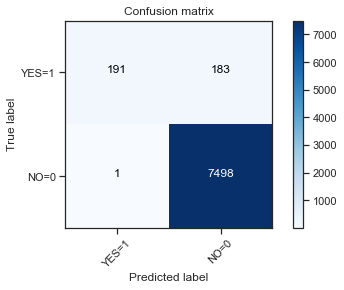

In [59]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),classes=['YES=1','NO=0'],normalize= False,  title='Confusion matrix')


### Cross Validation

Cross Validation is a technique which involves reserving a particular sample of a data set on which you do not train the model. Later, you test the model on this sample before finalizing the model.

In [50]:
# from sklearn.cross_validation import KFold

# cv = KFold(n=len(bank_final),  # Number of elements
#            n_folds=10,            # Desired number of cv folds
#            random_state=12) 
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [55]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv.split(X):
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.9794635373009221, 0.9727577535624476, 0.9777870913663035, 0.9811399832355406, 0.9798826487845766, 0.9782062028499581, 0.9752620545073375, 0.9773584905660377, 0.9727463312368972, 0.9790356394129979] 

Average accuracy:  0.977363973282302


### Stratified cross-validation
Stratification is a technique where we rearrange the data in a way that each fold has a good representation of the whole dataset. It forces each fold to have at least m instances of each class

In [61]:
# Stratified cross validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
Decesion_Tree = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('strtified cross validation accuracy',Decesion_Tree)

strtified cross validation accuracy 0.9777259097323812
